# Generating Dataset

In [1]:


"""import cv2

cap = cv2.VideoCapture(0)

count1 = 100
count2 = 100
count3 = 100
count4 = 100
while(True):
    ret, frame = cap.read()
    cv2.imshow("Live Video", frame)


    if(cv2.waitKey(1) & 0xFF == ord('a')):
        count1 += 1
        cv2.imwrite(f"dataset/gesture_1/gesture_1_{count1}.jpg", frame)

    if(cv2.waitKey(1) & 0xFF == ord('b')):
        count2 += 1
        cv2.imwrite(f"dataset/gesture_2/gesture_2_{count2}.jpg", frame)

    if(cv2.waitKey(1) & 0xFF == ord('c')):
        count3 += 1
        cv2.imwrite(f"dataset/gesture_3/gesture_3_{count3}.jpg", frame)

    if(cv2.waitKey(1) & 0xFF == ord('d')):
        count4 += 1
        cv2.imwrite(f"dataset/gesture_4/gesture_4_{count4}.jpg", frame)

    if(cv2.waitKey(1) & 0xFF == ord('q')):
        cap.release()
        cv2.destroyAllWindows()
        break
"""

'import cv2\n\ncap = cv2.VideoCapture(0)\n\ncount1 = 100\ncount2 = 100\ncount3 = 100\ncount4 = 100\nwhile(True):\n    ret, frame = cap.read()\n    cv2.imshow("Live Video", frame)\n\n\n    if(cv2.waitKey(1) & 0xFF == ord(\'a\')):\n        count1 += 1\n        cv2.imwrite(f"dataset/gesture_1/gesture_1_{count1}.jpg", frame)\n\n    if(cv2.waitKey(1) & 0xFF == ord(\'b\')):\n        count2 += 1\n        cv2.imwrite(f"dataset/gesture_2/gesture_2_{count2}.jpg", frame)\n\n    if(cv2.waitKey(1) & 0xFF == ord(\'c\')):\n        count3 += 1\n        cv2.imwrite(f"dataset/gesture_3/gesture_3_{count3}.jpg", frame)\n\n    if(cv2.waitKey(1) & 0xFF == ord(\'d\')):\n        count4 += 1\n        cv2.imwrite(f"dataset/gesture_4/gesture_4_{count4}.jpg", frame)\n\n    if(cv2.waitKey(1) & 0xFF == ord(\'q\')):\n        cap.release()\n        cv2.destroyAllWindows()\n        break\n'

# Save Files in CSV

In [2]:
import os
import csv

# Base directory where the dataset is stored
base_dir = "dataset"

#base_dir = "dataset2"

# Output CSV file
output_csv = "images.csv"

# Open the CSV file for writing
with open(output_csv, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    
    # Write the headers
    writer.writerow(["Path", "Label"])
    
    # Walk through the dataset directory
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        """# Ensure it's a folder
        if os.path.isdir(folder_path):
            label = folder_name  # Use folder name as the label
            if folder_name == "gesture_1":
                label = "checazzo"
            if folder_name == "gesture_2":
                label = "peace"
            if folder_name == "gesture_3":
                label = "nice"
            if folder_name == "gesture_4":
                label = "nogesture"
"""
        # Ensure it's a folder
        if os.path.isdir(folder_path):
            label = folder_name  # Use folder name as the label
            if folder_name == "gesture_1":
                label = "scissor"
            if folder_name == "gesture_2":
                label = "rock"
            if folder_name == "gesture_3":
                label = "paper"
            if folder_name == "gesture_4":
                label = "nogesture"

            
            # Loop through each file in the folder
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                
                # Ensure it's an image file (check extension)
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    # Write the relative path and label to the CSV
                    writer.writerow([file_path, label])

print(f"Images and labels have been saved to {output_csv}")

Images and labels have been saved to images.csv


# Initialize functions

In [3]:
import os
import pandas as pd
import torchvision
import torch
from torchvision import transforms

import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.data import Dataset
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
from PIL import Image



class CustomImageDataset(Dataset):
    def __init__(self, root_dir,csv_file, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        #self.class_to_idx = {cls: idx for idx, cls in enumerate(
        #    ['checazzo', 'peace', 'nice', 'nogesture'])}
        self.class_to_idx = {cls: idx for idx, cls in enumerate(
            ['scissor', 'rock', 'paper', 'nogesture'])}
    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path)
        image = image.convert("L")


        label = self.annotations.iloc[idx, 1]
        label = self.class_to_idx[label]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [4]:
import cv2
import numpy as np
import random


class CustomTransform:
    def __init__(self):
        self.counter_rotation = 0
        self.counter_flipping = 0
        self.counter_blurring = 0
        self.counter_sharpening = 0
        self.counter_noise = 0
        self.counter_scale = 0

    def random_rotation(self, image):
        """Rotate the image by a random angle (90, 180, or 270 degrees)."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        rows, cols = image.shape
        angle = random.choice([90, 180, 270])  # Randomly choose an angle
        M = cv2.getRotationMatrix2D((cols / 2.0, rows / 2.0), angle, 1)
        rotated = cv2.warpAffine(image, M, (cols, rows))

        rotated = np.expand_dims(rotated, axis=0)  # Convert back to (1, H, W)
        self.counter_rotation += 1
        return rotated

    def random_flipping(self, image):
        """Flip the image randomly."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        flip_code = random.choice([-1, 0, 1])  # -1: both axes, 0: vertical, 1: horizontal
        flipped = cv2.flip(image, flip_code)

        flipped = np.expand_dims(flipped, axis=0)  # Convert back to (1, H, W)
        self.counter_flipping += 1
        return flipped

    def random_blurring(self, image):
        """Apply random Gaussian blur."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        kernel_size = random.choice([3, 5, 7])  # Use smaller kernel sizes
        blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

        blurred = np.expand_dims(blurred, axis=0)  # Convert back to (1, H, W)
        self.counter_blurring += 1
        return blurred

    def random_sharpening(self, image):
        """Apply a sharpening kernel."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        kernel = np.array([[-1, -1, -1],
                           [-1, 9, -1],
                           [-1, -1, -1]])
        sharpened = cv2.filter2D(image, -1, kernel)

        sharpened = np.expand_dims(sharpened, axis=0)  # Convert back to (1, H, W)
        self.counter_sharpening += 1
        return sharpened

    def add_random_noise(self, image):
        """Add random Gaussian noise."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        row, col = image.shape
        mean = 0
        var = random.uniform(0.001, 0.005)
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, (row, col))
        noisy = image + gauss

        noisy = np.clip(noisy, 0, 255).astype(np.uint8)  # Ensure valid pixel range
        noisy = np.expand_dims(noisy, axis=0)  # Convert back to (1, H, W)
        self.counter_noise += 1
        return noisy

    def random_scaling(self, image):
        """Randomly scale the image and resize to (128, 128)."""
        if image.shape[0] == 1:  # Grayscale: (1, H, W)
            image = np.squeeze(image, axis=0)  # Convert to (H, W)

        scaling_zoom_factor = random.uniform(0.7, 1.5)
        scaled = cv2.resize(image, None, fx=scaling_zoom_factor, fy=scaling_zoom_factor, interpolation=cv2.INTER_LINEAR)
        scaled = cv2.resize(scaled, (128, 128))  # Resize back to (128, 128)

        scaled = np.expand_dims(scaled, axis=0)  # Convert back to (1, H, W)
        self.counter_scale += 1
        return scaled

    def __call__(self, image):
        """Apply a random combination of augmentations."""
        augmentations = [
            self.random_rotation,
            self.random_flipping,
            self.random_blurring,
            self.random_sharpening,
            self.add_random_noise,
        ]
        random.shuffle(augmentations)

        # Apply the first transformation from the shuffled list
        transformed = augmentations[0](image)
        # Apply scaling to ensure the final output is standardized
        scaled_transformed = self.random_scaling(transformed)

        return (
            transformed,
            scaled_transformed,
            self.counter_rotation,
            self.counter_flipping,
            self.counter_blurring,
            self.counter_sharpening,
            self.counter_noise,
            self.counter_scale,
        )


In [5]:
import os
import numpy as np
import torch
from PIL import Image
import random
import shutil

# Augment Dataset with Labels and Save Images
def augment_and_add_to_dataset(dataset, transform, num_augmentations=1, save_dir='augmented_dataset'):
    """
    Augment the dataset by applying transformations to each image
    and appending the augmented images with the same labels to the dataset.
    Saves the augmented images in class-specific directories.

    Args:
        dataset: The original dataset (CustomImageDataset or similar).
        transform: The transformation class with custom augmentation functions.
        num_augmentations: Number of augmented versions to create per image.
        save_dir: Root directory where augmented images will be saved.

    Returns:
        Augmented dataset (list of tuples with image tensor and label).
    """
    counter_rotation = 0
    counter_flipping = 0
    counter_blurring = 0
    counter_sharpening = 0
    counter_noise = 0
    counter_scaling = 0



    """   # Clear the directory if it exists
    if os.path.exists(save_dir):
        shutil.rmtree(save_dir)  # Delete everything inside the folder
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)  # Create the base directory for augmented dataset
    """
    augmented_data = []

    for idx in range(len(dataset)):
        image, label = dataset[idx]
        
        # Convert tensor back to numpy for transformation
        original_image = image.squeeze(0).numpy()
        #print(original_image.shape)
        # Add the original image and label
        augmented_data.append((image, label))

        # Create class-specific directory if it doesn't exist
        class_dir = os.path.join(save_dir, f'class_{label}')
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

        # Save the original image
        #save_image(original_image, class_dir, num_augmentations, 'original')

        # Create augmented versions and save them
        for i in range(num_augmentations):
            augmented_image, scaled, counter_rotation,counter_flipping, counter_blurring, counter_sharpening, counter_noise, counter_scaling = transform(original_image)
            augmented_image_tensor = torch.tensor(augmented_image)
            scaled = torch.tensor(scaled)
            # Save augmented image
            #save_image(augmented_image, class_dir,num_augmentations, f'aug_{i + 1}')
            #print(augmented_image.shape)
            augmented_data.append((augmented_image_tensor, label))
            augmented_data.append((scaled, label))

     # Apply only the first transformation from the shuffled list
    print("Counter rotation: ", counter_rotation)
    print("Counter flipping: ", counter_flipping)
    print("Counter blurring: ", counter_blurring)
    print("Counter sharpening: ", counter_sharpening)
    print("Counter noise: ", counter_noise)
    print("Counter scaling: ", counter_scaling)
    return augmented_data


def save_image(image, class_dir, num_augmentations, suffix):
    """
    Save the image to the specified directory with the given suffix.
    """
    
    # If the image has shape (channels, height, width), transpose to (height, width, channels)
    if image.ndim == 3 and image.shape[0] == 3:
        image = np.transpose(image, (1, 2, 0))
    
    # Convert to uint8 if necessary
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to uint8

    #print(f"Processed image shape: {image.shape}, dtype: {image.dtype}")

    # Convert the numpy array to a PIL image
    pil_image = Image.fromarray(image)

    # Create a unique filename for each image
    filename = f"{suffix}_{random.randint(0, 1000)}.jpg"  # Adding randomness to avoid overwriting

    # Save the image in the class directory
    pil_image.save(os.path.join(class_dir, filename))





In [6]:
seed = 42
generator = torch.Generator().manual_seed(seed)

BATCH_SIZE = 64


current_dir = os.getcwd()
print(f"Current directory: {current_dir}")


#classes = ('checazzo', 'peace', 'nice', 'nogesture')

classes = ('scissor', 'rock', 'paper', 'nogesture')
# Set up transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)), # Resize the image to 32x32
    transforms.ToTensor(),  # Converts to tensor of shape [1, H, W]
    ])

# Instantiate custom transformation
custom_transform_100 = CustomTransform()
custom_transform_200 = CustomTransform()
custom_transform_300 = CustomTransform()

# Create dataset
original_dataset = CustomImageDataset(csv_file='images.csv', root_dir=os.getcwd(), transform=transform)
print(f"Original dataset size: {len(original_dataset)}")
# Split dataset into 80% train and 20% test
train_size_original = int(0.8 * len(original_dataset))
test_size_original = len(original_dataset) - train_size_original
train_set_original, test_set_original = random_split(original_dataset, [train_size_original, test_size_original],generator=generator)
# Create DataLoaders
train_loader_original = DataLoader(train_set_original, batch_size=BATCH_SIZE, shuffle=True)
test_loader_original = DataLoader(test_set_original, batch_size=BATCH_SIZE, shuffle=False)


# Augment the dataset by 100 images per class
num_augmentations_100 = 1  # Number of augmented versions per original image
dataset_100 = augment_and_add_to_dataset(train_set_original, custom_transform_100, num_augmentations_100, save_dir='augmented_dataset100')
print(f"Augmented dataset size: {len(dataset_100)}")
# Split dataset into 80% train and 20% 
train_size_100 = int(0.8 * len(dataset_100))
test_size_100 = len(dataset_100) - train_size_100
#train_set_100, test_set_100 = random_split(dataset_100, [train_size_100, test_size_100],generator=generator)
# Create DataLoaders
train_loader_100 = DataLoader(dataset_100, batch_size=BATCH_SIZE, shuffle=True)
#test_loader_100 = DataLoader(test_set_100, batch_size=32, shuffle=False)

# Augment the dataset by 200 images per class
num_augmentations_200 = 2  # Number of augmented versions per original image
dataset_200 = augment_and_add_to_dataset(train_set_original, custom_transform_200, num_augmentations_200, save_dir='augmented_dataset200')
print(f"Augmented dataset size: {len(dataset_200)}")
# Split dataset into 80% train and 20% test
train_size_200 = int(0.8 * len(dataset_200))
test_size_200 = len(dataset_200) - train_size_200
#train_set_200, test_set_200 = random_split(dataset_200, [train_size_200, test_size_200],generator=generator)
# Create DataLoaders
train_loader_200 = DataLoader(dataset_200, batch_size=BATCH_SIZE, shuffle=True)
#test_loader_200 = DataLoader(test_set_200, batch_size=32, shuffle=False)


# Augment the dataset by 300 images per class
num_augmentations_300 = 3  # Number of augmented versions per original image
dataset_300 = augment_and_add_to_dataset(train_set_original, custom_transform_300, num_augmentations_300, save_dir='augmented_dataset300')
print(f"Augmented dataset size: {len(dataset_300)}")
# Split dataset into 80% train and 20% test
train_size_300 = int(0.8 * len(dataset_300))
test_size_300 = len(dataset_300) - train_size_300
#train_set_300, test_set_300 = random_split(dataset_300, [train_size_300, test_size_300],generator=generator)
# Create DataLoaders
train_loader_300 = DataLoader(dataset_300, batch_size=BATCH_SIZE, shuffle=True)
#test_loader_300 = DataLoader(test_set_300, batch_size=32, shuffle=False)



Current directory: c:\Visual Computing\Project
Original dataset size: 175
Counter rotation:  28
Counter flipping:  24
Counter blurring:  27
Counter sharpening:  30
Counter noise:  31
Counter scaling:  140
Augmented dataset size: 420
Counter rotation:  48
Counter flipping:  63
Counter blurring:  74
Counter sharpening:  45
Counter noise:  50
Counter scaling:  280
Augmented dataset size: 700
Counter rotation:  81
Counter flipping:  101
Counter blurring:  79
Counter sharpening:  71
Counter noise:  88
Counter scaling:  420
Augmented dataset size: 980


In [8]:
# Function to show images
"""def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()

    # Remove extra singleton dimensions (1, 1, 3, 32, 32) => (3, 32, 32)
    npimg = np.squeeze(npimg)  # Remove the extra singleton dimensions

    # If the image has 3 channels (RGB), we can directly display it
    if npimg.shape[0] == 3:
        npimg = np.transpose(npimg, (1, 2, 0))  # Transpose to (32, 32, 3) for RGB format

    plt.imshow(npimg)  # Show the image with RGB channels
    plt.show()
   """
import matplotlib.pyplot as plt
import numpy as np

# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize (if normalized with mean=0.5, std=0.5)
    npimg = img.numpy()

    # Remove extra singleton dimensions (e.g., (1, 1, 32, 32) -> (1, 32, 32))
    npimg = np.squeeze(npimg)

    if len(npimg.shape) == 2:  # If the image is 2D (grayscale)
        plt.imshow(npimg, cmap='gray')
    elif len(npimg.shape) == 3 and npimg.shape[0] == 3:  # If the image has 3 channels (RGB)
        npimg = np.transpose(npimg, (1, 2, 0))  # Transpose to (H, W, 3) for RGB
        plt.imshow(npimg)
    else:
        raise ValueError("Unexpected image shape: {}".format(npimg.shape))

    plt.axis('off')  # Optional: Turn off the axis
    plt.show()
 

# Get some random training images

#dataset_iter = iter(train_loader_original)
#images, labels = next(dataset_iter)

"""# Loop through each image in the batch
for i, image in enumerate(images):
    print(f"Image {i + 1}")
    imshow(image)
    print(f"Label: {classes[labels[i].item()]}")"""

'# Loop through each image in the batch\nfor i, image in enumerate(images):\n    print(f"Image {i + 1}")\n    imshow(image)\n    print(f"Label: {classes[labels[i].item()]}")'

# CNN

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

##CNN Architecture

#Generally the CNN output size can be calculated as follows (for an image with same height and width dimensions):
#output_size = ((input_size - kernel_size + 2*padding) / stride) + 1

#Since we transform each image to grayscale we have 1 input channel.
# Also we use padding, because the most relevant informations lie in the center of the images.csv

#input size of each image: 128x128

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5, padding=1) #output size = 124x124
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, padding=1) #output size = 60*60
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1) #output size = 30*30
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, padding=1) #output size = 14*14
        #self.conv5 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        #self.conv6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

        # Pooling layer for downsampling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Dropout layers for regularization
        self.dropout = nn.Dropout(0.5)


        # Fully connected layers
        self.fc1 = nn.Linear(64*7*7, 1000)
        self.fc2 = nn.Linear(1000, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 64)
        self.fc5 = nn.Linear(64, 4) #4 output classes 3 gestures and 1 for no gesture

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # output size = 62*62
        x = self.pool(F.relu(self.conv2(x))) # output size = 30*30
        x = self.pool(F.relu(self.conv3(x))) #output size = 15*15
        x = self.pool(F.relu(self.conv4(x))) # output size = 7*7

       # x = F.relu(self.conv5(x)) #output size = 8x8
       # x = self.pool(F.relu(self.conv6(x))) # output size = 4x4

        x = x.view(-1, 64*7*7)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        x = self.fc5(x) #no activation function because we use CrossEntropyLoss

        return x

In [10]:
#Hyperparameters
LEARNING_RATE = 0.001
EPOCHS = 50

# Check if the GPU is available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

print(device)


model_original = Net()
optimizer_original = torch.optim.Adam(model_original.parameters(), lr=LEARNING_RATE)
criterion_original = nn.CrossEntropyLoss()


model_100 = Net()
optimizer_100 = torch.optim.Adam(model_100.parameters(), lr=LEARNING_RATE)
criterion_100 = nn.CrossEntropyLoss()


model_200 = Net()
optimizer_200 = torch.optim.Adam(model_200.parameters(), lr=LEARNING_RATE)
criterion_200 = nn.CrossEntropyLoss()


model_300 = Net()
optimizer_300 = torch.optim.Adam(model_300.parameters(), lr=LEARNING_RATE)
criterion_300 = nn.CrossEntropyLoss()




print(model_original)


cpu
Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=3136, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=4, bias=True)
)


In [11]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [12]:
from torchsummary import summary

summary(model_original, (1, 128, 128)) # (channels, height, width of input image)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 126, 126]             208
         MaxPool2d-2            [-1, 8, 63, 63]               0
            Conv2d-3           [-1, 16, 61, 61]           3,216
         MaxPool2d-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 32, 30, 30]           4,640
         MaxPool2d-6           [-1, 32, 15, 15]               0
            Conv2d-7           [-1, 64, 14, 14]          32,832
         MaxPool2d-8             [-1, 64, 7, 7]               0
            Linear-9                 [-1, 1000]       3,137,000
          Dropout-10                 [-1, 1000]               0
           Linear-11                  [-1, 512]         512,512
          Dropout-12                  [-1, 512]               0
           Linear-13                  [-1, 256]         131,328
          Dropout-14                  [

In [13]:

def train(model, train_loader, optimizer, criterion, n_epochs=None):
    model.train()
    losses = []
    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(train_loader,0):
        
        #get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)
            inputs = inputs.float()
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            loss_value = loss.item()
            losses.append(loss_value)
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, loss: {running_loss / len(train_loader)}")

    print('Finished Training')
    return losses


Epoch 1, loss: 1.3923401832580566
Epoch 2, loss: 1.3932160139083862
Epoch 3, loss: 1.3943286339441936
Epoch 4, loss: 1.3606269359588623
Epoch 5, loss: 1.3961084286371868
Epoch 6, loss: 1.3421716292699177
Epoch 7, loss: 1.3720664580663045
Epoch 8, loss: 1.3313251733779907
Epoch 9, loss: 1.331113378206889
Epoch 10, loss: 1.3994311889012654
Epoch 11, loss: 1.3484675884246826
Epoch 12, loss: 1.3326948881149292
Epoch 13, loss: 1.3481057087580364
Epoch 14, loss: 1.366152286529541
Epoch 15, loss: 1.3733991384506226
Epoch 16, loss: 1.3238862752914429
Epoch 17, loss: 1.3174500862757366
Epoch 18, loss: 1.2810532251993816
Epoch 19, loss: 1.2342675924301147
Epoch 20, loss: 1.1659911076227825
Epoch 21, loss: 1.181391954421997
Epoch 22, loss: 1.1615001360575359
Epoch 23, loss: 1.0896291335423787
Epoch 24, loss: 1.0682278672854106
Epoch 25, loss: 0.9951531291007996
Epoch 26, loss: 0.8754462003707886
Epoch 27, loss: 1.0038474798202515
Epoch 28, loss: 0.8279005885124207
Epoch 29, loss: 0.81672193606694

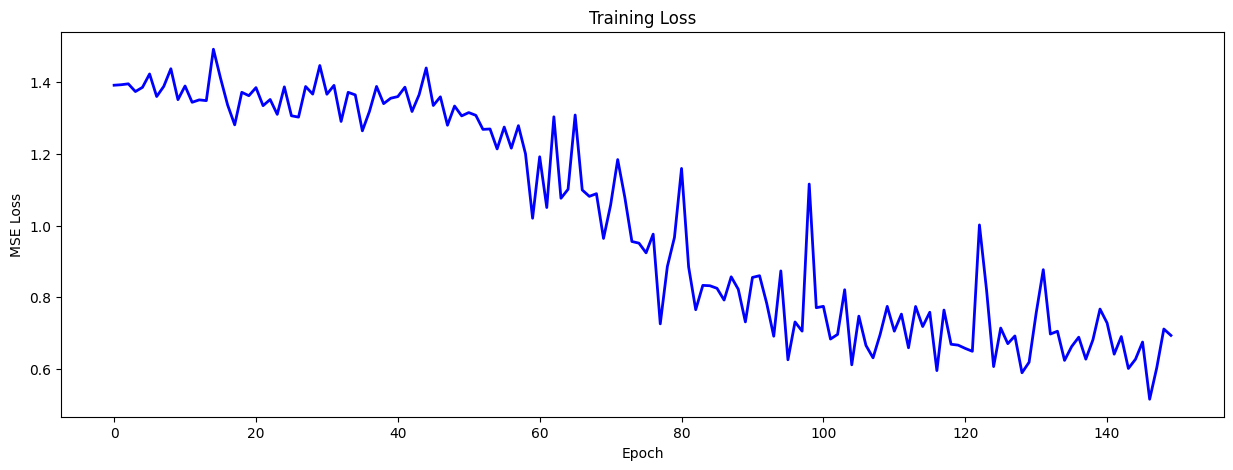

In [14]:
losses_original = train(model=model_original, train_loader=train_loader_original, optimizer=optimizer_original, criterion=criterion_original, n_epochs=EPOCHS)

plt.figure(figsize=(15, 5))
plt.plot(losses_original, lw=2,color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# Save the trained model
PATH = './model_original.pth'
torch.save(model_original.state_dict(), PATH)

Epoch 1, loss: 1.3714855398450578
Epoch 2, loss: 1.3536357879638672
Epoch 3, loss: 1.3520004408700126
Epoch 4, loss: 1.3556174891335624
Epoch 5, loss: 1.3532207012176514
Epoch 6, loss: 1.3526372568947929
Epoch 7, loss: 1.3497392450060164
Epoch 8, loss: 1.3455919027328491
Epoch 9, loss: 1.3416169370923723
Epoch 10, loss: 1.3067456824438912
Epoch 11, loss: 1.2393805469785417
Epoch 12, loss: 1.1831438371113367
Epoch 13, loss: 1.176511219569615
Epoch 14, loss: 1.1523175920758928
Epoch 15, loss: 1.1119304384504045
Epoch 16, loss: 1.0876320259911674
Epoch 17, loss: 1.0674705505371094
Epoch 18, loss: 1.0664937921932764
Epoch 19, loss: 0.9819374084472656
Epoch 20, loss: 0.934431118624551
Epoch 21, loss: 0.9312712209565299
Epoch 22, loss: 0.889075117451804
Epoch 23, loss: 0.8465037090437753
Epoch 24, loss: 0.8175351193972996
Epoch 25, loss: 0.8175615753446307
Epoch 26, loss: 0.8087647557258606
Epoch 27, loss: 0.7607099839619228
Epoch 28, loss: 0.7287455115999494
Epoch 29, loss: 0.75248941353389

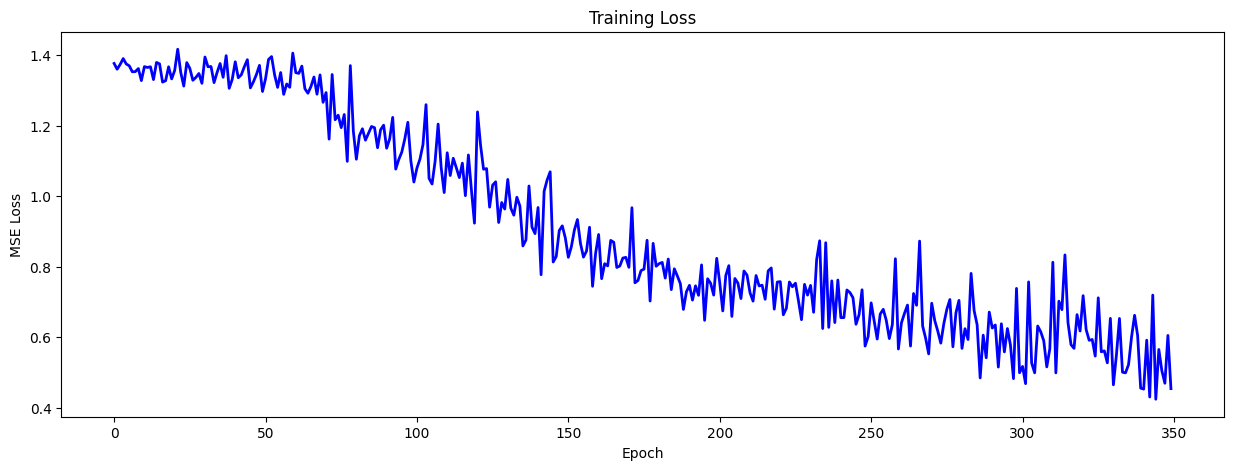

In [15]:
losses_100 = train(model=model_100, train_loader=train_loader_100, optimizer=optimizer_100, criterion=criterion_100, n_epochs=EPOCHS)

plt.figure(figsize=(15, 5))
plt.plot(losses_100, lw=2,color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# Save the trained model
PATH = './model_100.pth'
torch.save(model_100.state_dict(), PATH)

Epoch 1, loss: 1.371497479352084
Epoch 2, loss: 1.3564976237036965
Epoch 3, loss: 1.3531004190444946
Epoch 4, loss: 1.3462333679199219
Epoch 5, loss: 1.3532376722856
Epoch 6, loss: 1.337508580901406
Epoch 7, loss: 1.3242301832545886
Epoch 8, loss: 1.2662095806815408
Epoch 9, loss: 1.177281683141535
Epoch 10, loss: 1.1328850117596714
Epoch 11, loss: 1.1261324990879407
Epoch 12, loss: 1.057459982958707
Epoch 13, loss: 1.0043986277146773
Epoch 14, loss: 0.9498276277021929
Epoch 15, loss: 0.8760862838138234
Epoch 16, loss: 0.8049609661102295
Epoch 17, loss: 0.7263826727867126
Epoch 18, loss: 0.7030608057975769
Epoch 19, loss: 0.6581446420062672
Epoch 20, loss: 0.630357639356093
Epoch 21, loss: 0.5710937326604669
Epoch 22, loss: 0.5270874554460699
Epoch 23, loss: 0.4796084030108018
Epoch 24, loss: 0.4661025269465013
Epoch 25, loss: 0.48160683566873724
Epoch 26, loss: 0.4848987676880576
Epoch 27, loss: 0.4590868760238994
Epoch 28, loss: 0.39222844351421704
Epoch 29, loss: 0.32311919602480804

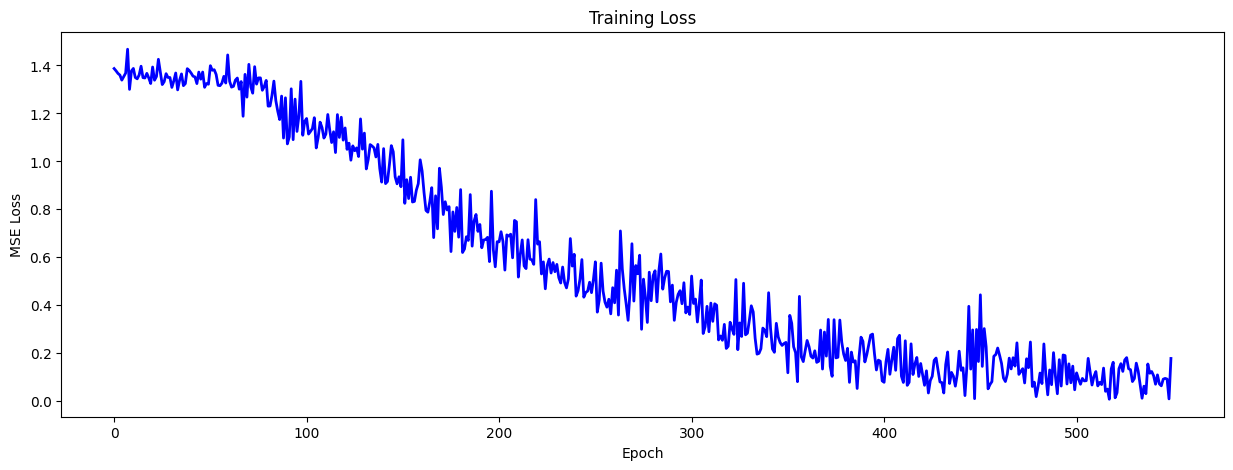

In [16]:
losses_200 = train(model=model_200, train_loader=train_loader_200, optimizer=optimizer_200, criterion=criterion_200, n_epochs=EPOCHS)

plt.figure(figsize=(15, 5))
plt.plot(losses_200, lw=2,color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# Save the trained model
PATH = './model_200.pth'
torch.save(model_200.state_dict(), PATH)

Epoch 1, loss: 1.3565512523055077
Epoch 2, loss: 1.3551041409373283
Epoch 3, loss: 1.3497380167245865
Epoch 4, loss: 1.35045475512743
Epoch 5, loss: 1.3530217036604881
Epoch 6, loss: 1.3354134112596512
Epoch 7, loss: 1.2977533787488937
Epoch 8, loss: 1.241473414003849
Epoch 9, loss: 1.137548640370369
Epoch 10, loss: 1.0588828921318054
Epoch 11, loss: 0.959173146635294
Epoch 12, loss: 0.91964440792799
Epoch 13, loss: 0.810601495206356
Epoch 14, loss: 0.7857095785439014
Epoch 15, loss: 0.7077816128730774
Epoch 16, loss: 0.6464376263320446
Epoch 17, loss: 0.554394293576479
Epoch 18, loss: 0.48993295431137085
Epoch 19, loss: 0.42825809121131897
Epoch 20, loss: 0.3542869761586189
Epoch 21, loss: 0.2655089572072029
Epoch 22, loss: 0.27597254514694214
Epoch 23, loss: 0.27021370362490416
Epoch 24, loss: 0.29110746597871184
Epoch 25, loss: 0.22123405570164323
Epoch 26, loss: 0.21958426479250193
Epoch 27, loss: 0.2313333812635392
Epoch 28, loss: 0.17222753912210464
Epoch 29, loss: 0.155207555042

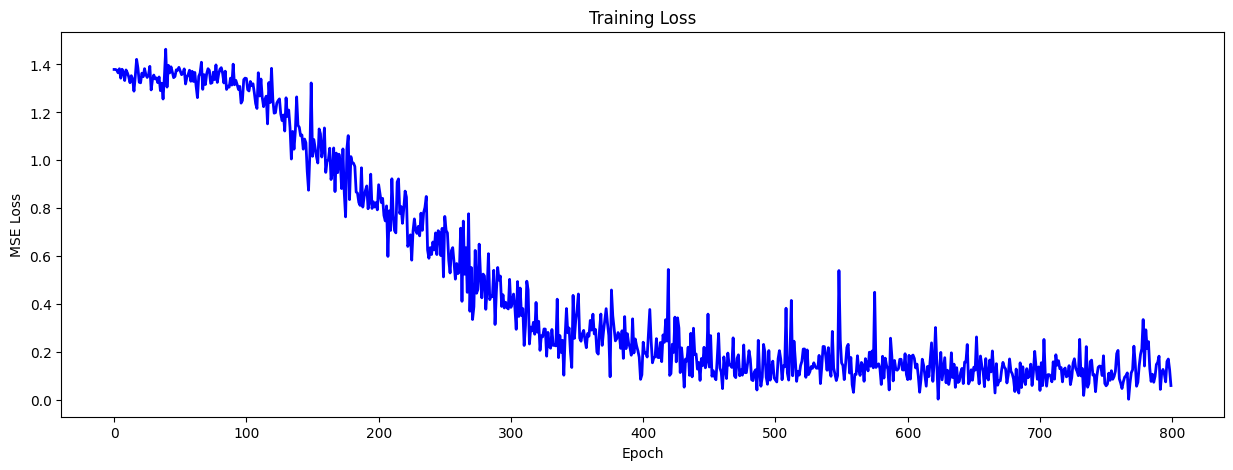

In [17]:
losses_300 = train(model=model_300, train_loader=train_loader_300, optimizer=optimizer_300, criterion=criterion_300, n_epochs=EPOCHS)

plt.figure(figsize=(15, 5))
plt.plot(losses_300, lw=2,color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# Save the trained model
PATH = './model_300.pth'
torch.save(model_300.state_dict(), PATH)

C:\Users\gabri\AppData\Local\Temp\ipykernel_30756\3775393825.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_original.load_state_dict(torch.load('model_original.pt

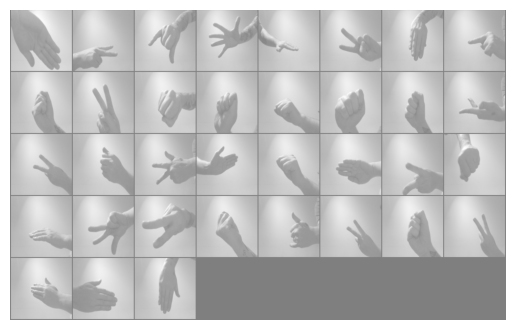

In [18]:
model_original.load_state_dict(torch.load('model_original.pth'))

# Check the testset
dataiter = iter(test_loader_original)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)

# print images
imshow(torchvision.utils.make_grid(images.cpu()))


# Resnet

In [19]:
from torchvision import models
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = 4  # For CIFAR-10

# Load ResNet18
model_resnet = models.resnet18(pretrained=True).to(device)


# Modify the first convolutional layer to accept 1 channel instead of 3
# Get the original first convolutional layer
original_conv1 = model_resnet.conv1

# Create a new convolutional layer with 1 input channel
model_resnet.conv1 = nn.Conv2d(
    in_channels=1,  # Grayscale images have 1 channel
    out_channels=original_conv1.out_channels,
    kernel_size=original_conv1.kernel_size,
    stride=original_conv1.stride,
    padding=original_conv1.padding,
    bias=original_conv1.bias is not None
)

# Copy the pretrained weights from the original convolutional layer
if original_conv1.weight.shape[1] == 3:  # If using pretrained RGB weights
    model_resnet.conv1.weight.data = original_conv1.weight.data.mean(dim=1, keepdim=True)

# Optional: If you're training from scratch, the weights will be initialized randomly

# Verify the model
print(model_resnet)




ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [20]:
# Prevent the trained weights from being modified
for name, param in model_resnet.named_parameters():
  if 'fc' not in name: # Adjust this condition to target specific layers if needed
    param.requires_grad = False


# Compute the input feature size for the first fc layer
num_ftrs_resnet = model_resnet.fc.in_features
print(num_ftrs_resnet)

# Create a new set of fc layers
classifier = [
    nn.Linear(in_features=num_ftrs_resnet, out_features=256).to(device),
    nn.ReLU(inplace=True).to(device),
    nn.Dropout(p=0.3, inplace=False).to(device),
    nn.Linear(in_features=256, out_features=4, bias=True).to(device)
]

model_resnet.fc = nn.Sequential(*classifier).to(device) # Replace the model classifier

512


In [21]:
criterion_resnet = nn.CrossEntropyLoss()
optimizer_resnet = torch.optim.Adam(model_resnet.parameters(), lr=0.01)

In [22]:
def train_resnet(model_resnet, train_loader, optimizer_resnet, criterion, n_epochs):
    losses = []
    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
                    
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)
            inputs = inputs.float()

            # zero the parameter gradients
            optimizer_resnet.zero_grad()

            # forward + backward + optimize
            outputs = model_resnet(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer_resnet.step()

            losses.append(loss.item())
            # print statistics
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, loss: {running_loss / len(train_loader)}")
    return losses 

In [23]:
# Check the accuracy of the finetuned network on the test set
def test_resnet(model_resnet, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.float()
            outputs = model_resnet(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on test images with ResNet and a slightly modified classifier: %d %%' % (
        100 * correct / total))

Epoch 1, loss: 2.7246590852737427
Epoch 2, loss: 3.1937201817830405
Epoch 3, loss: 1.7744665145874023
Epoch 4, loss: 0.5654158691565195
Epoch 5, loss: 1.037993053595225
Epoch 6, loss: 0.561399390300115
Epoch 7, loss: 0.7054304679234823
Epoch 8, loss: 0.31635711590449017
Epoch 9, loss: 0.3330957293510437
Epoch 10, loss: 0.44260624051094055
Epoch 11, loss: 0.3276009460290273
Epoch 12, loss: 0.23939146598180136
Epoch 13, loss: 0.1736525520682335
Epoch 14, loss: 0.21671509742736816
Epoch 15, loss: 0.174777090549469
Epoch 16, loss: 0.5162011732657751
Epoch 17, loss: 0.23805369436740875
Epoch 18, loss: 0.22107458114624023
Epoch 19, loss: 0.1013363425930341
Epoch 20, loss: 0.22338410715262094
Epoch 21, loss: 0.08150757600863774
Epoch 22, loss: 0.20239616185426712
Epoch 23, loss: 0.1292308842142423
Epoch 24, loss: 0.17653228839238486
Epoch 25, loss: 0.12540113925933838
Epoch 26, loss: 0.06301765143871307
Epoch 27, loss: 0.06722097098827362
Epoch 28, loss: 0.03690898480514685
Epoch 29, loss: 0.

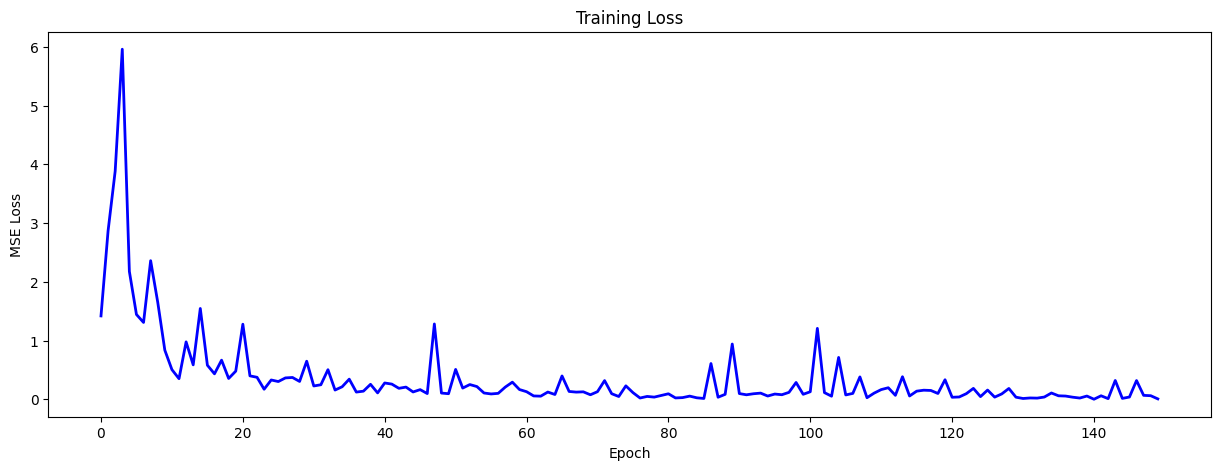

In [24]:
losses_resnet = train_resnet(model_resnet, train_loader_original, optimizer_resnet, criterion_resnet, n_epochs=50)


plt.figure(figsize=(15, 5))
plt.plot(losses_resnet, lw=2,color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.show()

# Save the trained model
PATH = './resnet.pth'
torch.save(model_resnet.state_dict(), PATH)

In [25]:
# load the model 
model_resnet.load_state_dict(torch.load('resnet.pth')) 

# Test the ResNet model
test_resnet(model_resnet, test_loader_original)

C:\Users\gabri\AppData\Local\Temp\ipykernel_30756\439065298.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_resnet.load_state_dict(torch.load('resnet.pth'))


Accuracy of the network on test images with ResNet and a slightly modified classifier: 85 %


# Evaluation

In [26]:
def test_accuracy(model, test_loader, device='cpu'):
    """
    Calculate and return the accuracy of the model on the test set.

    Parameters:
    - model: The trained PyTorch model
    - test_loader: DataLoader for the test dataset
    - device: The device ('cpu' or 'cuda') on which the model and data reside

    Returns:
    - accuracy: Overall accuracy of the model on the test set (in percentage)
    """
    correct = 0
    total = 0
    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():  # Disable gradient computation
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.float()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Compute overall accuracy
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')
    return accuracy


In [27]:
# Calculate the overall accuracy
print("Model original")
overall_accuracy_original = test_accuracy(model_original, test_loader_original, device=device)

print("\nModel 100")
overall_accuracy_100 = test_accuracy(model_100, test_loader_original, device=device)

print("\nModel 200")
overall_accuracy_200 = test_accuracy(model_200, test_loader_original, device=device)

print("\nModel 300")
overall_accuracy_300 = test_accuracy(model_300, test_loader_original, device=device)

print("\nResNet")
overall_accuracy_resnet = test_accuracy(model_resnet, test_loader_original, device=device)


Model original
Accuracy of the network on the test images: 45.71 %

Model 100
Accuracy of the network on the test images: 71.43 %

Model 200
Accuracy of the network on the test images: 74.29 %

Model 300
Accuracy of the network on the test images: 68.57 %

ResNet
Accuracy of the network on the test images: 91.43 %


In [28]:
def accuracy(model, test_loader, classes, device='cpu'):
    """
    Calculate and print the accuracy for each class.

    Parameters:
    - model: The trained PyTorch model
    - test_loader: DataLoader for the test dataset
    - classes: List of class names
    - device: The device ('cpu' or 'cuda') on which the model and data reside

    Returns:
    - class_accuracies: A dictionary with class names as keys and accuracy percentages as values
    """
    # Switch the model to evaluation mode
    model.eval()

    # Initialize variables for correct and total counts per class
    class_correct = list(0. for _ in range(len(classes)))
    class_total = list(0. for _ in range(len(classes)))

    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.float()
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels)
            for i in range(len(labels)):
                label = labels[i].item()
                class_correct[label] += c[i].item()
                class_total[label] += 1

    # Compute and print accuracy for each class
    class_accuracies = {}
    for i in range(len(classes)):
        if class_total[i] > 0:  # Check to avoid division by zero
            accuracy = 100 * class_correct[i] / class_total[i]
            print(f'Accuracy of {classes[i]} : {accuracy:.2f} %')
            class_accuracies[classes[i]] = accuracy
        else:
            print(f'Accuracy of {classes[i]} : No samples available')
            class_accuracies[classes[i]] = None

    return class_accuracies


In [29]:
# Call the accuracy function
print("Model original")
class_accuracies = accuracy(model_original, test_loader_original, classes, device=device)

print("\nModel 100")
class_accuracies_100 = accuracy(model_100, test_loader_original, classes, device=device)

print("\nModel 200")
class_accuracies_200 = accuracy(model_200, test_loader_original, classes, device=device)

print("\nModel 300")
class_accuracies_300 = accuracy(model_300, test_loader_original, classes, device=device)

print("\nModel Resnet and Augmentation")
class_accuracies_resnet = accuracy(model_resnet, test_loader_original, classes, device=device)


Model original
Accuracy of scissor : 0.00 %
Accuracy of rock : 0.00 %
Accuracy of paper : 100.00 %
Accuracy of nogesture : 100.00 %

Model 100
Accuracy of scissor : 75.00 %
Accuracy of rock : 54.55 %
Accuracy of paper : 77.78 %
Accuracy of nogesture : 85.71 %

Model 200
Accuracy of scissor : 87.50 %
Accuracy of rock : 72.73 %
Accuracy of paper : 55.56 %
Accuracy of nogesture : 85.71 %

Model 300
Accuracy of scissor : 62.50 %
Accuracy of rock : 81.82 %
Accuracy of paper : 44.44 %
Accuracy of nogesture : 85.71 %

Model Resnet and Augmentation
Accuracy of scissor : 100.00 %
Accuracy of rock : 90.91 %
Accuracy of paper : 77.78 %
Accuracy of nogesture : 100.00 %


In [30]:
from sklearn.metrics import f1_score

def calculate_f1_score(y_true, y_pred, average='weighted'):
    """
    Calculate the F1 score for a classification problem.

    Parameters:
    - y_true: List or array of true class labels
    - y_pred: List or array of predicted class labels
    - average: The averaging method ('micro', 'macro', or 'weighted')

    Returns:
    - f1: F1 score (float)
    """
    f1 = f1_score(y_true, y_pred, average=average)
    print(f"F1 Score ({average}): {f1:.2f}")
    return f1


In [31]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate and visualize results
def evaluate_model(model, test_loader, label_map, device='cpu',average='weighted'):
    """
    Evaluate the model on a test set and visualize the results.

    Parameters:
    - model: The trained PyTorch model
    - test_loader: DataLoader for the test dataset
    - label_map: Dictionary mapping class indices to class names
    - device: The device ('cpu' or 'cuda') on which the model and data reside

    Returns:
    - accuracy: Overall accuracy of the model on the test set (in percentage)
    - conf_matrix: Confusion matrix of the test set predictions
    """
    model.eval()  # Set the model to evaluation mode

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.float()
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())  # Collect predictions
            all_labels.extend(labels.cpu().numpy())  # Collect true labels

    # Compute accuracy
    correct = sum(p == l for p, l in zip(all_preds, all_labels))
    total = len(all_labels)
    accuracy = 100 * correct / total

    #Compute F1 score
    f1 = calculate_f1_score(all_labels, all_preds, average=average)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # Print accuracy
    print(f"Accuracy of the network on the test set: {accuracy:.2f}%")

    # Visualize confusion matrix
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", 
                xticklabels=label_map.values(), 
                yticklabels=label_map.values())
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy, conf_matrix, f1


Model original
F1 Score (weighted): 0.29
Accuracy of the network on the test set: 45.71%


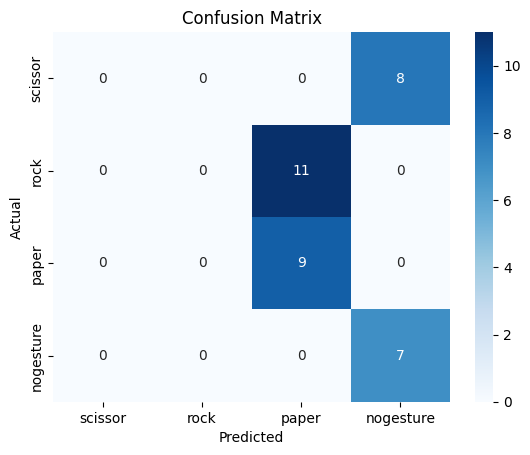


Model 100
F1 Score (weighted): 0.71
Accuracy of the network on the test set: 71.43%


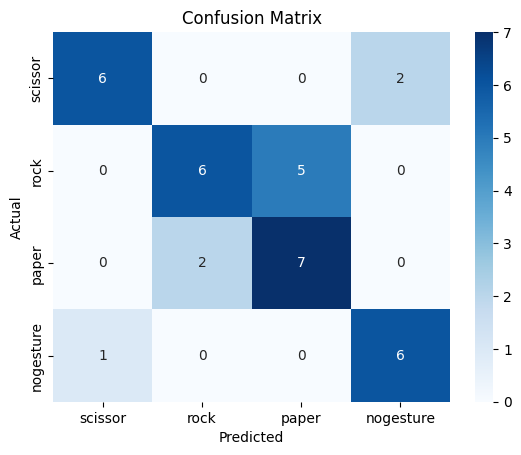


Model 200
F1 Score (weighted): 0.75
Accuracy of the network on the test set: 74.29%


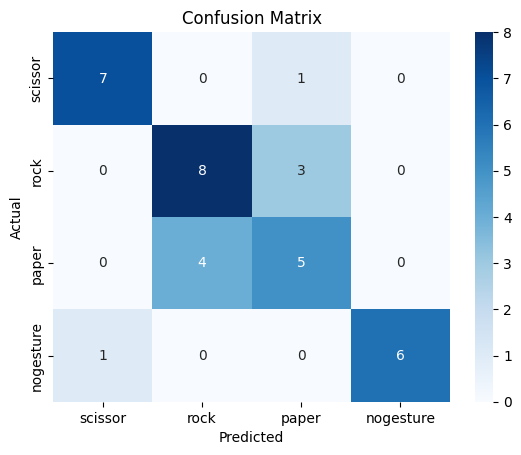


Model 300
F1 Score (weighted): 0.68
Accuracy of the network on the test set: 68.57%


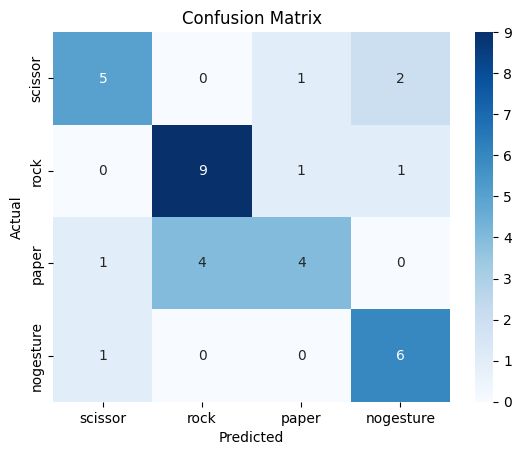


Model Resnet
F1 Score (weighted): 0.91
Accuracy of the network on the test set: 91.43%


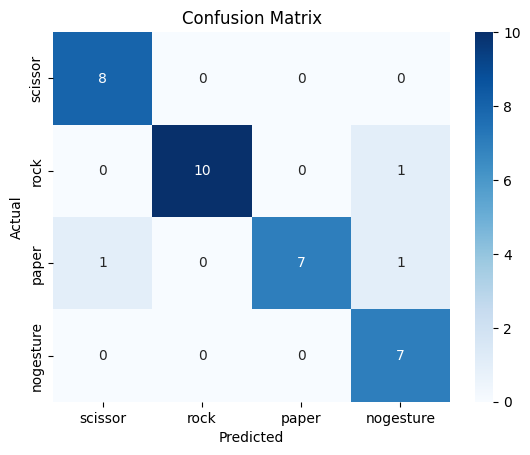

In [32]:
# Define the label map
label_map = {i: class_name for i, class_name in enumerate(classes)}

# Evaluate the model
print("Model original")
overall_accuracy, confusion_mat, f1 = evaluate_model(model_original, test_loader_original, label_map, device=device,average='weighted')

print("\nModel 100")
overall_accuracy_100, confusion_mat_100, f1_100 = evaluate_model(model_100, test_loader_original, label_map, device=device,average='weighted')

print("\nModel 200")
overall_accuracy_200, confusion_mat_200, f1_200 = evaluate_model(model_200, test_loader_original, label_map, device=device,average='weighted')

print("\nModel 300")
overall_accuracy_300, confusion_mat_300, f1_300 = evaluate_model(model_300, test_loader_original, label_map, device=device,average='weighted')

print("\nModel Resnet")
overall_accuracy_resnet, confusion_mat_resnet, f1_resnet = evaluate_model(model_resnet, test_loader_original, label_map, device=device,average='weighted')


# Demo

In [ ]:
import cv2
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Load your PyTorch model
# Load ResNet18
model_resnet = models.resnet18(pretrained=True).to(device)

# Modify the first convolutional layer to accept 1 channel instead of 3
# Get the original first convolutional layer
original_conv1 = model_resnet.conv1

# Create a new convolutional layer with 1 input channel
model_resnet.conv1 = nn.Conv2d(
    in_channels=1,  # Grayscale images have 1 channel
    out_channels=original_conv1.out_channels,
    kernel_size=original_conv1.kernel_size,
    stride=original_conv1.stride,
    padding=original_conv1.padding,
    bias=original_conv1.bias is not None
)

# Copy the pretrained weights from the original convolutional layer
if original_conv1.weight.shape[1] == 3:  # If using pretrained RGB weights
    model_resnet.conv1.weight.data = original_conv1.weight.data.mean(dim=1, keepdim=True)

# Prevent the trained weights from being modified
for name, param in model_resnet.named_parameters():
  if 'fc' not in name: # Adjust this condition to target specific layers if needed
    param.requires_grad = False


# Compute the input feature size for the first fc layer
num_ftrs_resnet = model_resnet.fc.in_features
print(num_ftrs_resnet)

# Create a new set of fc layers
classifier = [
    nn.Linear(in_features=num_ftrs_resnet, out_features=256).to(device),
    nn.ReLU(inplace=True).to(device),
    nn.Dropout(p=0.3, inplace=False).to(device),
    nn.Linear(in_features=256, out_features=4, bias=True).to(device)
]

model_resnet.fc = nn.Sequential(*classifier).to(device) # Replace the model classifier

model_resnet.load_state_dict(torch.load('resnet.pth'))
# Open webcam
cap = cv2.VideoCapture(0)

# Define preprocessing transforms for grayscale model
preprocess = transforms.Compose([
    transforms.ToPILImage(),                      # Convert OpenCV image (numpy array) to PIL
    transforms.Grayscale(num_output_channels=1),  # Convert RGB to grayscale
    transforms.Resize((128, 128)),                # Resize to model's input size
    transforms.ToTensor()                         # Convert to tensor
])

# Define device (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model_resnet.to(device)

# Gesture labels mapping
gestures = {0: "scissor", 1: "rock", 2: "paper", 3: "No Gesture"}

while True:
    try:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame")
            break

        frame = cv2.flip(frame, 1)
        kernel = np.ones((3, 3), np.uint8)

        # Define region of interest (ROI)
        roi = frame[100:300, 100:300]
        cv2.rectangle(frame, (100, 100), (300, 300), (0, 255, 0), 0)

        # Convert to HSV and create a mask for skin color
        hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        lower_skin = np.array([0, 20, 70], dtype=np.uint8)
        upper_skin = np.array([20, 255, 255], dtype=np.uint8)
        mask = cv2.inRange(hsv, lower_skin, upper_skin)

        # Preprocess mask
        mask = cv2.dilate(mask, kernel, iterations=4)
        mask = cv2.GaussianBlur(mask, (5, 5), 100)

        # Preprocess the mask for model input
        input_image = preprocess(mask)
        input_image = input_image.unsqueeze(0).to(device)  # Add batch dimension and move to device

        # Predict gesture
        with torch.no_grad():
            prediction = model(input_image)
            predicted_class_index = torch.argmax(prediction, dim=1).item()  # Get the predicted class label
            predicted_class_prob = torch.softmax(prediction, dim=1)[0][predicted_class_index].item() * 100  # Convert to percentage

        # Map label to gesture text
        gesture_text = gestures.get(predicted_class_index, "Unknown Gesture")

        # Display the result on the frame
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, f"Gesture: {gesture_text} ({predicted_class_prob:.2f}%)", (10, 50),
                    font, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Show the live webcam feed
        cv2.imshow('ROI', mask)
        cv2.imshow('Frame', frame)

        # Exit on pressing 'ESC'
        if cv2.waitKey(1) & 0xFF == 27:  # Press 'ESC' to quit
            break

    except Exception as e:
        print(f"Error: {e}")
        pass

# Release resources
cv2.destroyAllWindows()
cap.release()


In [34]:
"""import cv2
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Load your PyTorch model
model_300 = Net()
model_300.load_state_dict(torch.load('model_300.pth'))
model_300.eval()
# Open webcam
cap = cv2.VideoCapture(0)

# Define preprocessing transforms for grayscale model
preprocess = transforms.Compose([
    transforms.ToPILImage(),                      # Convert OpenCV image (numpy array) to PIL
    transforms.Grayscale(num_output_channels=1),  # Convert RGB to grayscale
    transforms.Resize((128, 128)),                # Resize to model's input size
    transforms.ToTensor()                         # Convert to tensor
])


# Define device (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model_original.to(device)

while True:
    try:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame")
            break

        frame = cv2.flip(frame, 1)
        kernel = np.ones((3, 3), np.uint8)

        # Define region of interest
        roi = frame[100:300, 100:300]
        cv2.rectangle(frame, (100, 100), (300, 300), (0, 255, 0), 0)

        # Convert to HSV and create a mask for skin color
        hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        lower_skin = np.array([0, 20, 70], dtype=np.uint8)
        upper_skin = np.array([20, 255, 255], dtype=np.uint8)
        mask = cv2.inRange(hsv, lower_skin, upper_skin)

        # Preprocess mask
        mask = cv2.dilate(mask, kernel, iterations=4)
        mask = cv2.GaussianBlur(mask, (5, 5), 100)

        # Show the live feed
        cv2.imshow('ROI', mask)
        cv2.imshow('Frame', frame)

        # Capture gesture on pressing a key
        k = cv2.waitKey(5) & 0xFF
        if k == ord('c'):  # Press 'c' to capture and evaluate the gesture
            print("Capturing and evaluating gesture...")
            

            input_image = preprocess(mask)
            input_image = input_image.unsqueeze(0).to(device)  # Add batch dimension and move to device
            
            # Predict gesture
            with torch.no_grad():
                print(f"Input shape: {input_image.shape}")  # Should be [1, 1, 128, 128] for grayscale or [1, 3, 128, 128] for RGB
                prediction = model(input_image)
                print(prediction)
            label = torch.argmax(prediction, dim=1).item()  # Get the predicted class label

            # Map labels to gestures
            gestures = {0: "rock", 1: "paper", 2: "scissor", 3: "No Gesture"}
            gesture_text = gestures.get(label, "Unknown Gesture")

            # Display the result in the console
            print(f"Predicted Gesture: {gesture_text}")

        # Exit on pressing 'ESC'
        if k == 27:  # Press 'ESC' to quit
            break

    except Exception as e:
        print(f"Error: {e}")
        pass

# Release resources
cv2.destroyAllWindows()
cap.release()"""


'import cv2\nimport torch\nimport torchvision.transforms as transforms\nfrom PIL import Image\nimport numpy as np\n\n# Load your PyTorch model\nmodel_300 = Net()\nmodel_300.load_state_dict(torch.load(\'model_300.pth\'))\nmodel_300.eval()\n# Open webcam\ncap = cv2.VideoCapture(0)\n\n# Define preprocessing transforms for grayscale model\npreprocess = transforms.Compose([\n    transforms.ToPILImage(),                      # Convert OpenCV image (numpy array) to PIL\n    transforms.Grayscale(num_output_channels=1),  # Convert RGB to grayscale\n    transforms.Resize((128, 128)),                # Resize to model\'s input size\n    transforms.ToTensor()                         # Convert to tensor\n])\n\n\n# Define device (CPU/GPU)\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\nmodel = model_original.to(device)\n\nwhile True:\n    try:\n        ret, frame = cap.read()\n        if not ret:\n            print("Failed to capture frame")\n            break\n\n        frame

In [35]:
"""import torch
import cv2
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
import torch
import torch.nn as nn


# Assuming your model is defined as model_300
def classify_grayscale_image(input_image_rgb, model, device):
    
    Classifies an RGB image after converting it to grayscale.

    Parameters:
    - input_image_rgb: A numpy array of shape (H, W, 3), representing the RGB image.
    - model: The trained PyTorch model for classification.
    - device: The device (CPU or GPU) where the model is loaded.

    Returns:
    - label: The predicted gesture label (0, 1, 2, etc.).
    - gesture_text: The predicted gesture name.
    

    # Step 1: Convert RGB to Grayscale
    input_image_gray = cv2.cvtColor(input_image_rgb, cv2.COLOR_BGR2GRAY)  # Convert RGB to Grayscale
    
    # Step 2: Preprocess the grayscale image
    preprocess = transforms.Compose([
        transforms.ToPILImage(),                      # Convert numpy array to PIL image
        transforms.Grayscale(num_output_channels=1),  # Ensure the image is single channel (grayscale)
        transforms.Resize((128, 128)),                # Resize to model's input size
        transforms.ToTensor()                         # Convert to tensor
    ])

    # Step 3: Apply transformations
    input_image = preprocess(input_image_gray)
    input_image = input_image.unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Step 4: Predict using the model
    with torch.no_grad():
        prediction = model(input_image)
    
    # Step 5: Get the predicted label (class index)
    label = torch.argmax(prediction, dim=1).item()

    # Step 6: Map label to gesture
    gestures = {0: "Gesture 0", 1: "Gesture 1", 2: "Gesture 2", 3: "No Gesture"}  # Customize your labels
    gesture_text = gestures.get(label, "Unknown Gesture")

    return label, gesture_text


# Example usage:
# Load the model
#model_300 = Net()  # Assuming Net() is your model architecture
#model_300.load_state_dict(torch.load('model_300.pth'))
#model_300.eval()


device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = 4  # For CIFAR-10

# Load ResNet18
model_resnet = models.resnet18(pretrained=True).to(device)

# Modify the first convolutional layer to accept 1 channel instead of 3
# Get the original first convolutional layer
original_conv1 = model_resnet.conv1

# Create a new convolutional layer with 1 input channel
model_resnet.conv1 = nn.Conv2d(
    in_channels=1,  # Grayscale images have 1 channel
    out_channels=original_conv1.out_channels,
    kernel_size=original_conv1.kernel_size,
    stride=original_conv1.stride,
    padding=original_conv1.padding,
    bias=original_conv1.bias is not None
)

# Copy the pretrained weights from the original convolutional layer
if original_conv1.weight.shape[1] == 3:  # If using pretrained RGB weights
    model_resnet.conv1.weight.data = original_conv1.weight.data.mean(dim=1, keepdim=True)

# Prevent the trained weights from being modified
for name, param in model_resnet.named_parameters():
  if 'fc' not in name: # Adjust this condition to target specific layers if needed
    param.requires_grad = False


# Compute the input feature size for the first fc layer
num_ftrs_resnet = model_resnet.fc.in_features
print(num_ftrs_resnet)

# Create a new set of fc layers
classifier = [
    nn.Linear(in_features=num_ftrs_resnet, out_features=256).to(device),
    nn.ReLU(inplace=True).to(device),
    nn.Dropout(p=0.3, inplace=False).to(device),
    nn.Linear(in_features=256, out_features=4, bias=True).to(device)
]

model_resnet.fc = nn.Sequential(*classifier).to(device) # Replace the model classifier



# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model_300.to(device)

# Capture image or load your input image (for example from webcam)
input_image_rgb = cv2.imread("test.jpg")  # Replace with your image path or webcam capture

# Classify the image
label, gesture_text = classify_grayscale_image(input_image_rgb, model_resnet, device)
print(f"Predicted Gesture: {gesture_text} (Label: {label})")
"""

'import torch\nimport cv2\nimport numpy as np\nimport torchvision.transforms as transforms\nfrom PIL import Image\nfrom torchvision import models\nimport torch\nimport torch.nn as nn\n\n\n# Assuming your model is defined as model_300\ndef classify_grayscale_image(input_image_rgb, model, device):\n    \n    Classifies an RGB image after converting it to grayscale.\n\n    Parameters:\n    - input_image_rgb: A numpy array of shape (H, W, 3), representing the RGB image.\n    - model: The trained PyTorch model for classification.\n    - device: The device (CPU or GPU) where the model is loaded.\n\n    Returns:\n    - label: The predicted gesture label (0, 1, 2, etc.).\n    - gesture_text: The predicted gesture name.\n    \n\n    # Step 1: Convert RGB to Grayscale\n    input_image_gray = cv2.cvtColor(input_image_rgb, cv2.COLOR_BGR2GRAY)  # Convert RGB to Grayscale\n    \n    # Step 2: Preprocess the grayscale image\n    preprocess = transforms.Compose([\n        transforms.ToPILImage(),     